# Homework 2

Michael Roper

## Problem 1

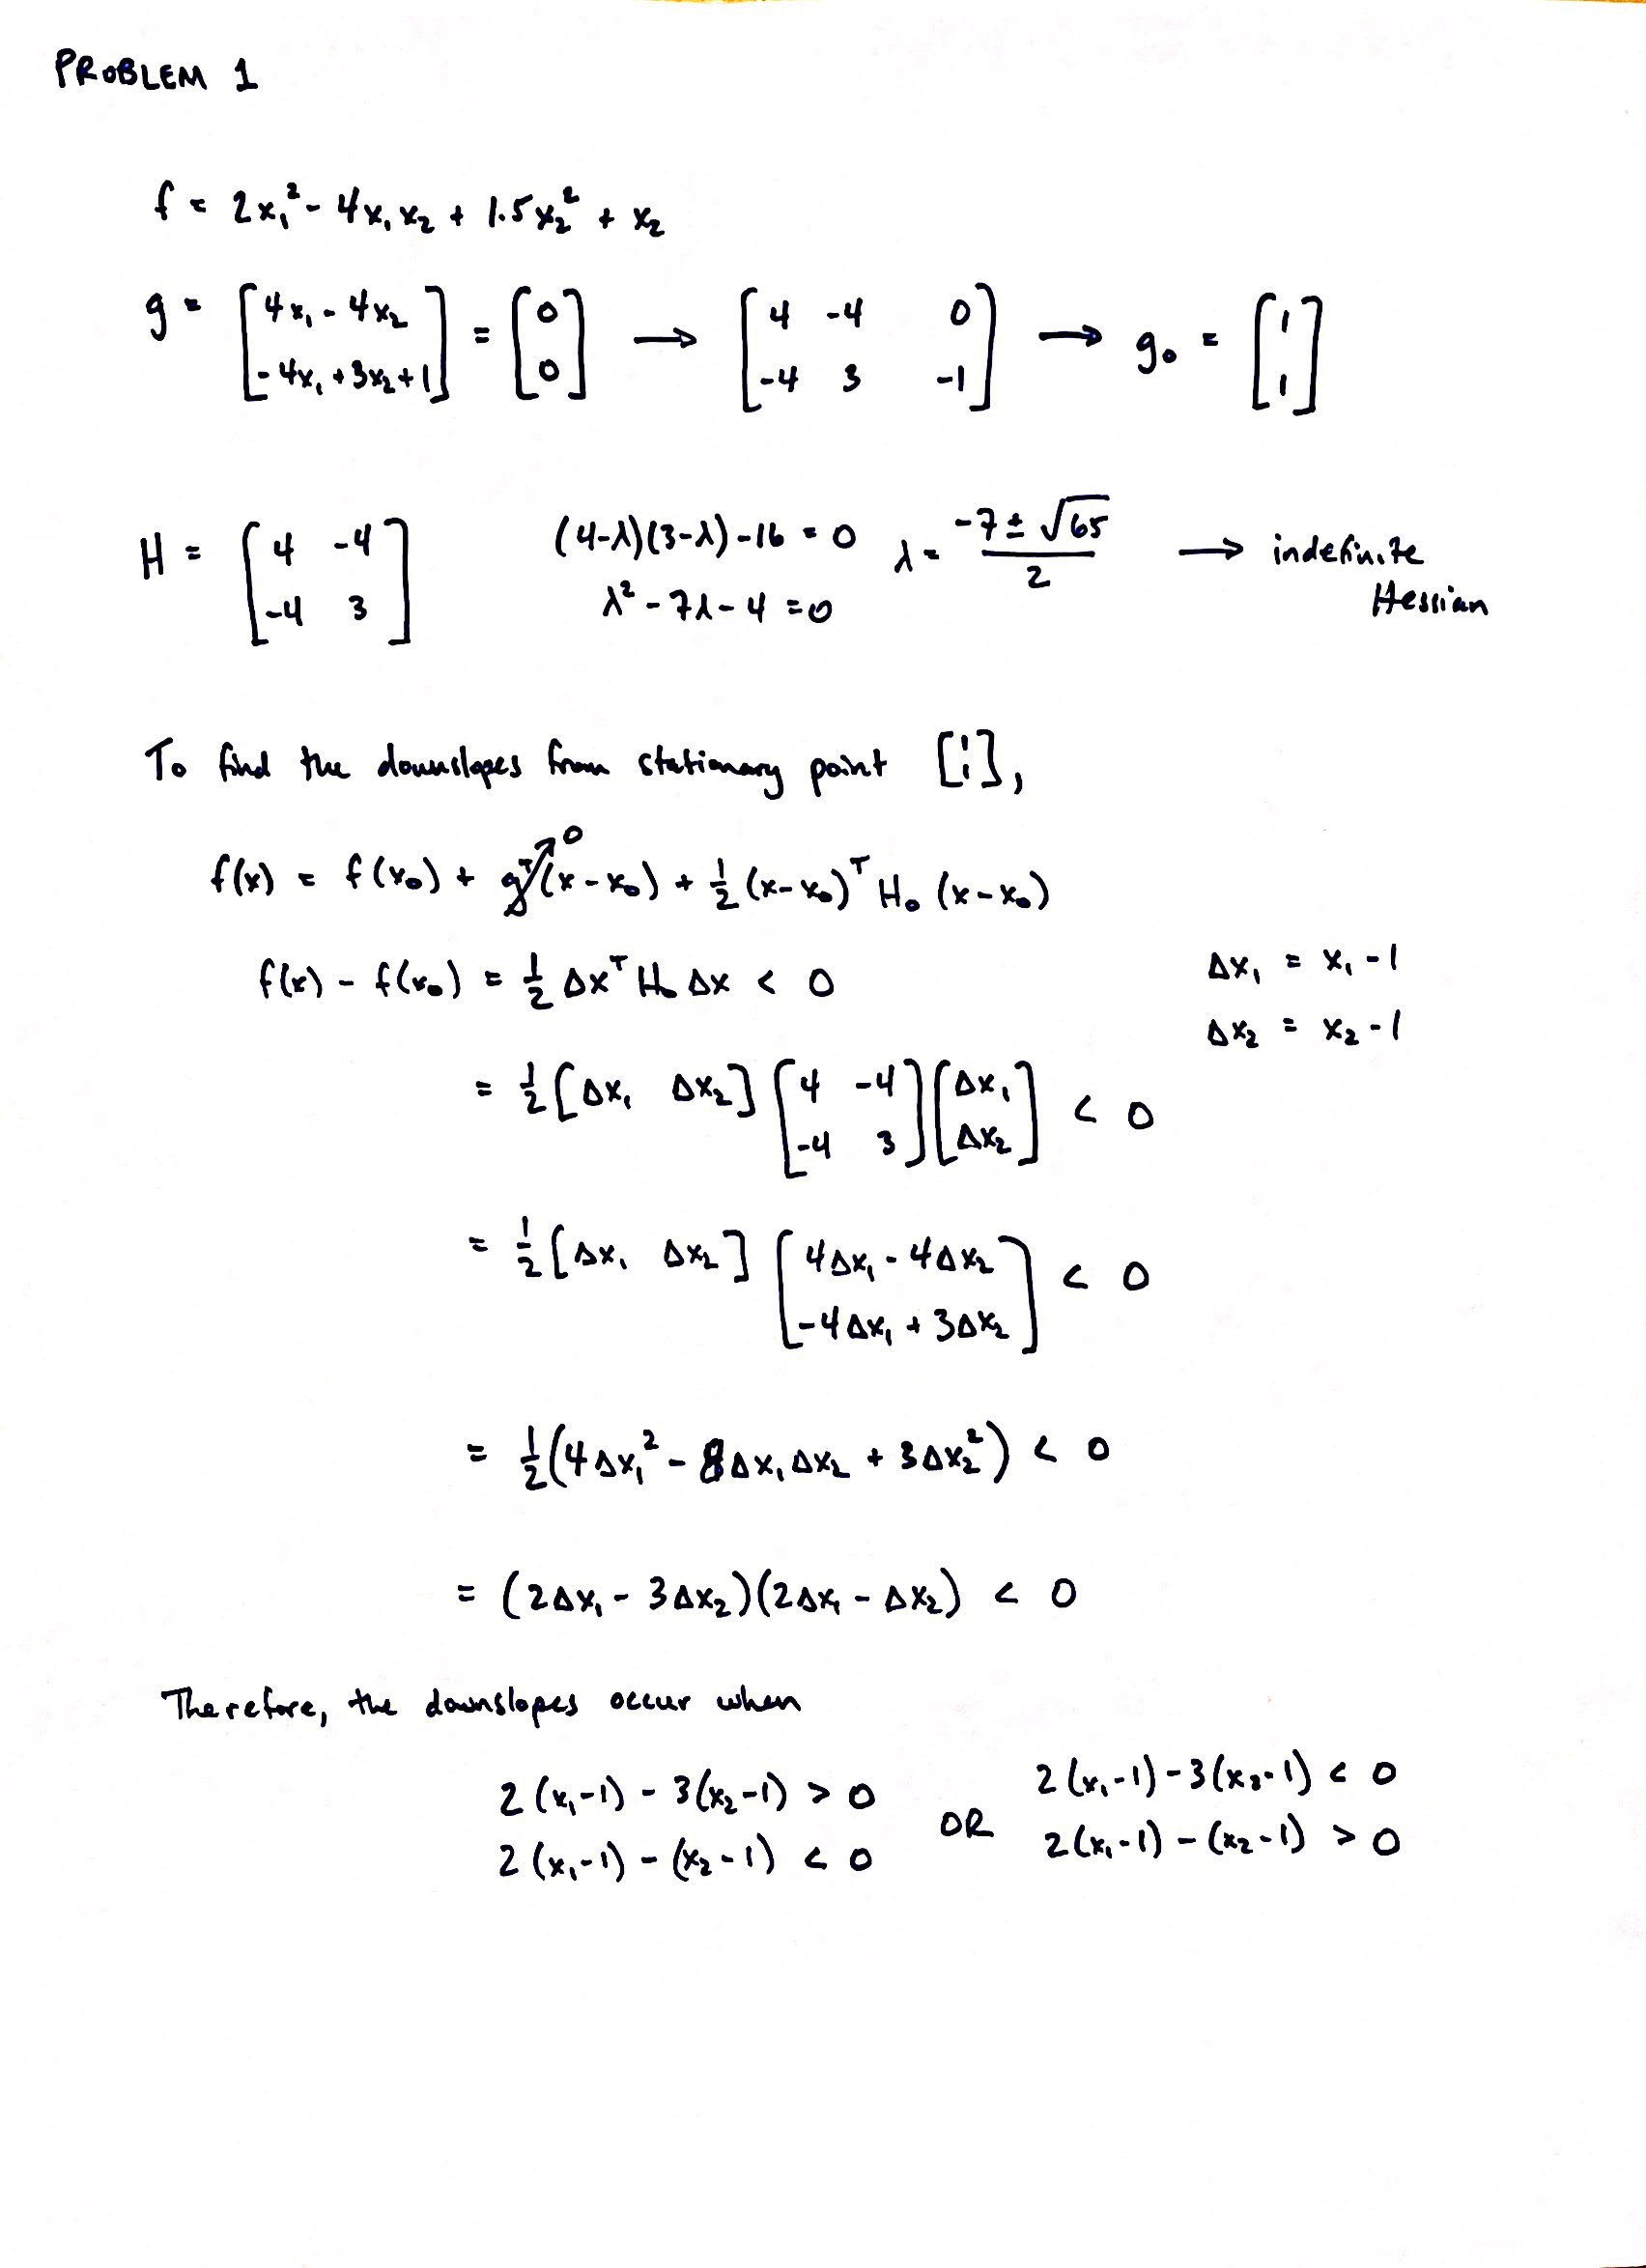

In [1]:
from IPython import display
display.Image("img/Problem 1.jpeg")

## Problem 2

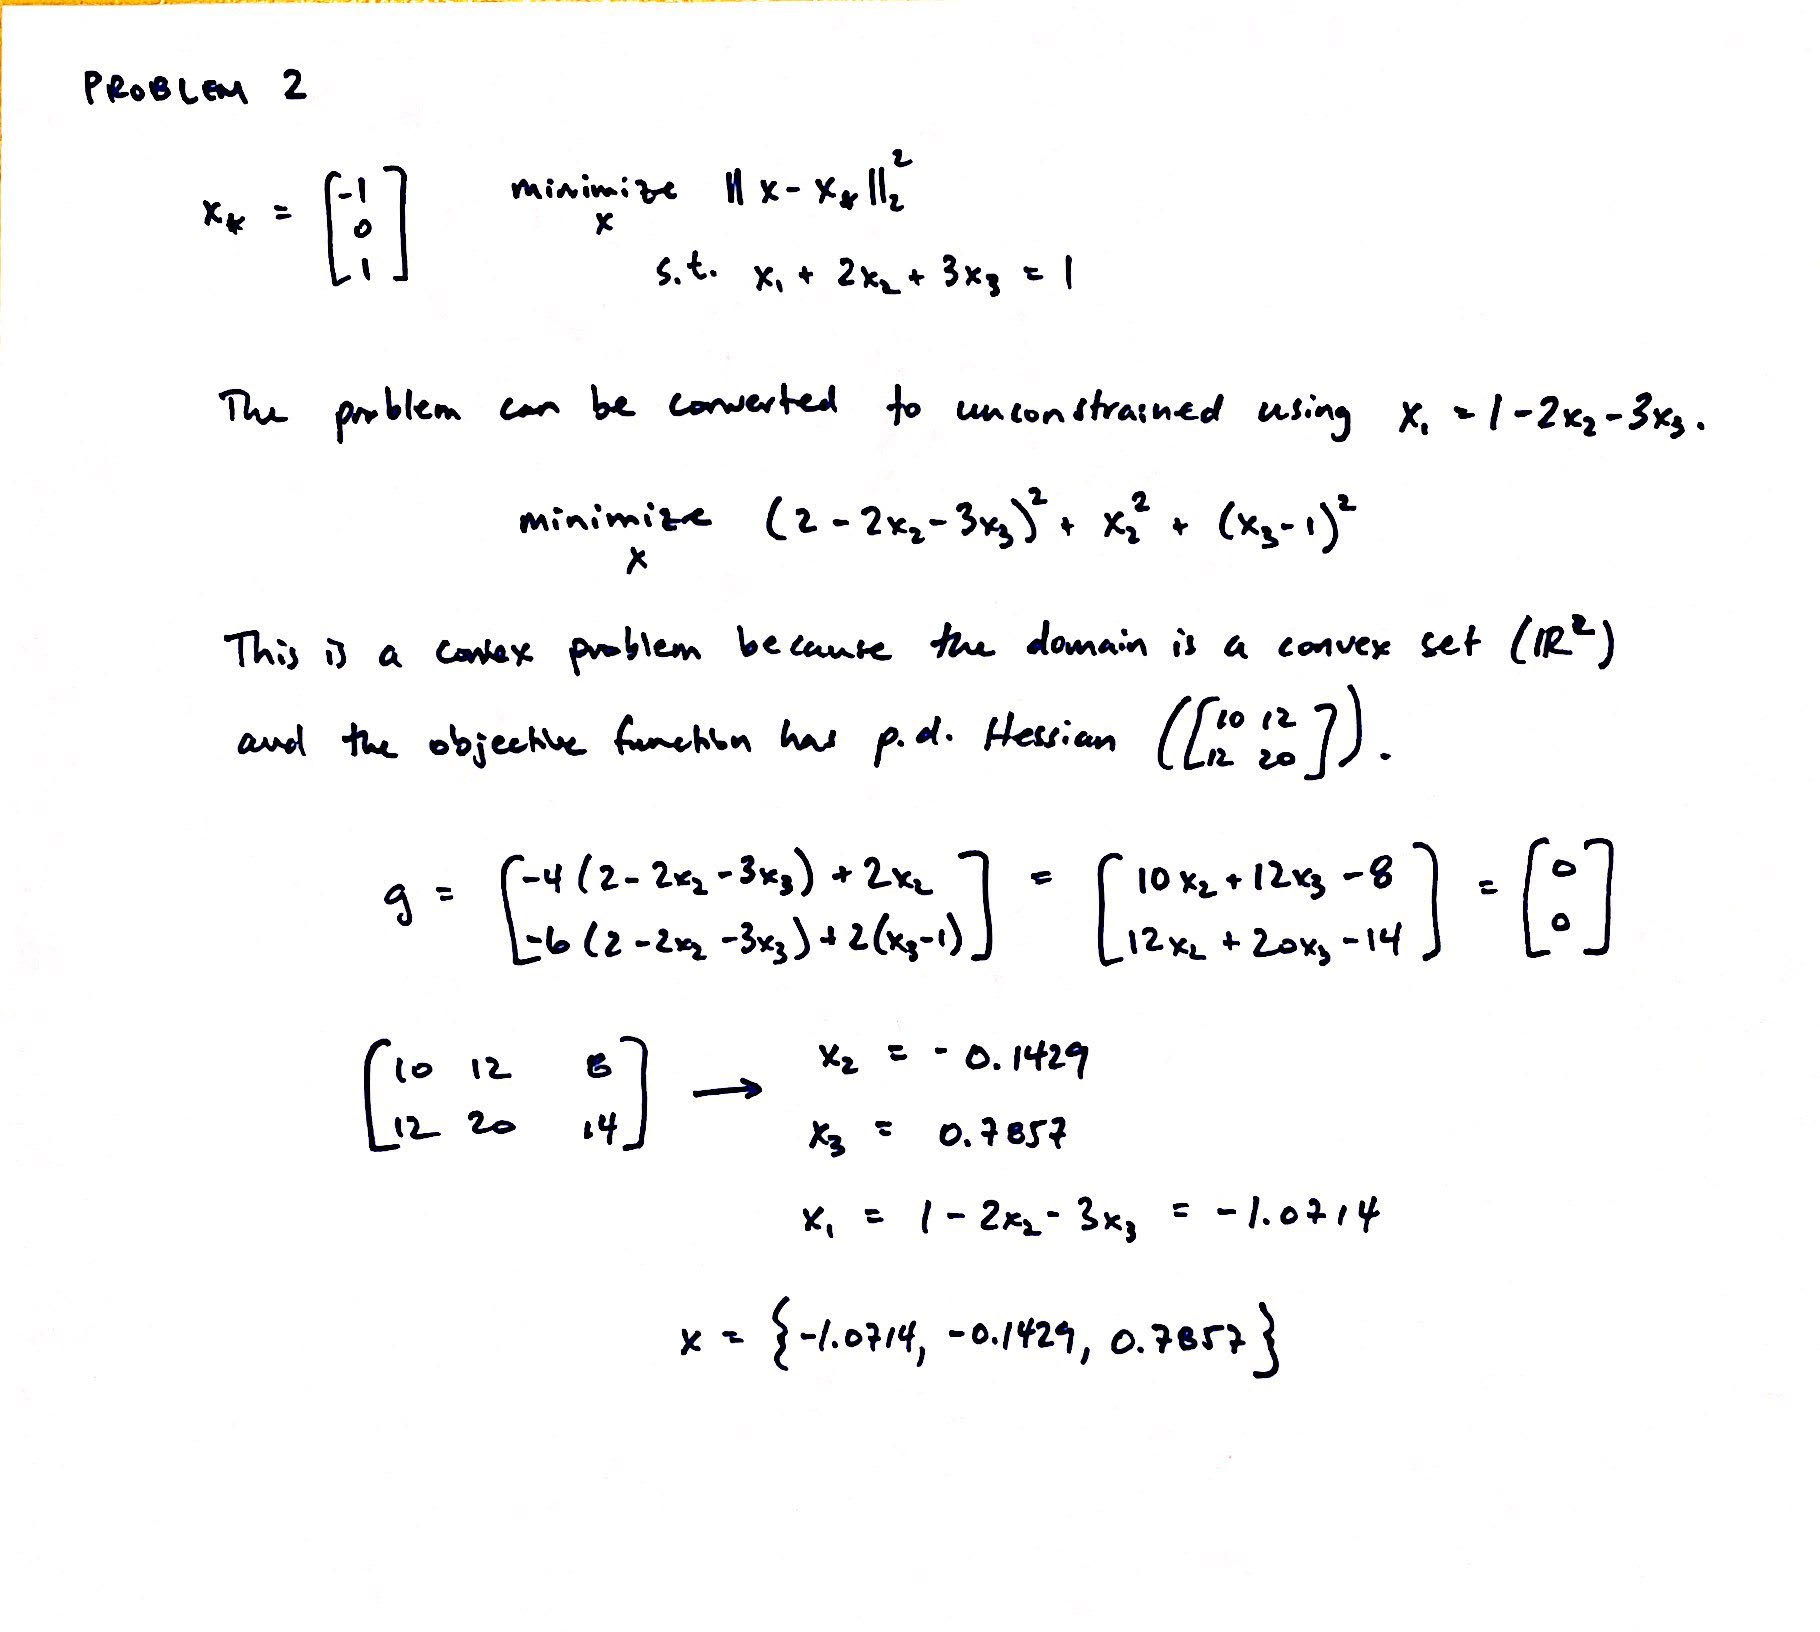

In [2]:
display.Image("img/Problem 2.jpeg")

The solution was determined analytically above. Now, the solution will be determined via the gradient descent and Newton's method algorithms below.

 The final solution is:
 (-1.0714285714285716, -0.14285306504235057, 0.7857115671710909)


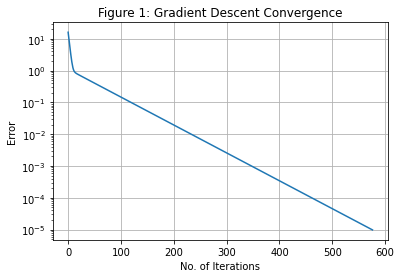

In [3]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Error handling for "DeprecationWarning" when using Numpy arrays
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Define objective function evaluated at x
def obj(x):
    return (2 - 2*x[1] - 3*x[2])**2 + x[1]**2 + (x[2] - 1)**2

# Define gradient of objective function evaluated at x
def grad(x):
    return np.array([[0], [10*x[1] + 12*x[2] - 8], [12*x[1] + 20*x[2] - 14]], dtype=float)

# Define norm function
def norm(x):
    return sum([i**2 for i in x])**0.5

x0 = np.array([[0.], [0.], [0.]], dtype=float)  # initial guess
eps = 1e-5  # termination threshold
soln = [x0]  # initialize solution storage array
x = soln[0]  # initialize "x" array
error = norm(grad(x))  # initialize error as the norm of the gradient
error_store = [error[0]]  # initialize error storage array
k = 1  # initialize counter

# Define inexact line search algorithm
def line_search(x, t):
    a = .01
    d = -grad(x)
    phi = lambda a, x: obj(x) + a*t*np.matmul(grad(x).transpose(), d)
    if phi(a, x)[0][0] < obj(x - a*grad(x))[0]:
        a = 0.5*a
    return a

# Gradient descent algorithm
while error[0] >= eps:
    a = line_search(x, 0.8)
    x = x - a*grad(x)
    soln.append(x)
    error = norm(grad(x))
    k += 1
    error_store.append(error[0])

# Calculate x1 and reorganize final solution
final_soln = soln[-1:][0]
final_soln = (1 - 2*final_soln[1][0] - 3*final_soln[2][0], final_soln[1][0], final_soln[2][0])
print(' The final solution is:\n', final_soln)

# Plot convergence (error versus iterations)
plt.plot(range(k), error_store)
plt.yscale("log")
plt.xlabel('No. of Iterations')
plt.ylabel('Error')
plt.title('Figure 1: Gradient Descent Convergence')
plt.grid()
plt.show()

The final solution using gradient descent is reported above, as well as the log-linear convergence plot in Figure 1. Using an initial step size of 0.01 and line search, it requires nearly 600 iterations to reach the solution.

Next, Newton's method will be used to solve the same problem.

 The final solution is:
 (-1.071428571428572, -0.1428571428571428, 0.7857142857142858)


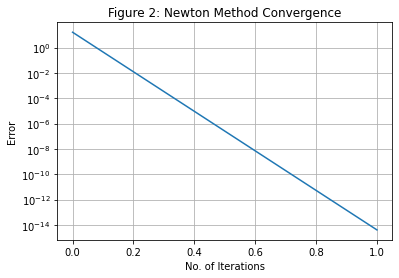

In [4]:
# Define inverse Hessian of objective function evaluated at x
def hessian(x):
    H = np.linalg.inv([[10, 12], [12, 20]])
    return np.array([[0, 0, 0], [0, H[0, 0], H[0, 1]], [0, H[1, 0], H[1, 1]]], dtype=float)

# Need to re-initialize parameters and storage arrays
x0 = np.array([[0.], [0.], [0.]], dtype=float)  # initial guess
eps = 1e-5  # termination threshold
soln = [x0]  # initialize solution storage array
x = soln[0]  # initialize "x" array
error = norm(grad(x))  # initialize error as the norm of the gradient
error_store = [error[0]]  # initialize error storage array
k = 1  # initialize counter

# Re-define line search algorithm with a = 1
def line_search(x, t):
    a = 1
    d = -grad(x)
    phi = lambda a, x: obj(x) + a*t*np.matmul(grad(x).transpose(), d)
    if phi(a, x)[0][0] < obj(x - a*grad(x))[0]:
        a = 0.5*a
    return a

# Newton's method
while error[0] >= eps:
    a = line_search(x, 0.8)
    x = x - np.matmul(hessian(x), grad(x))
    soln.append(x)
    error = norm(grad(x))
    k += 1
    error_store.append(error[0])

# Calculate x1 and reorganize final solution
final_soln = soln[-1:][0]
final_soln = (1 - 2*final_soln[1][0] - 3*final_soln[2][0], final_soln[1][0], final_soln[2][0])
print(' The final solution is:\n', final_soln)

# Plot convergence (error versus iterations)
plt.plot(range(k), error_store)
plt.yscale("log")
plt.xlabel('No. of Iterations')
plt.ylabel('Error')
plt.title('Figure 2: Newton Method Convergence')
plt.grid()
plt.show()

The final solution using Newton's method is reported above, as well as the log-linear convergence plot in Figure 2. It requires only one iteration to reach the solution.

The initial guesses used in all methods were the zero vector. The solutions of the analytical method and the gradient descent and Newton's method algorithms all agree.

## Problem 3

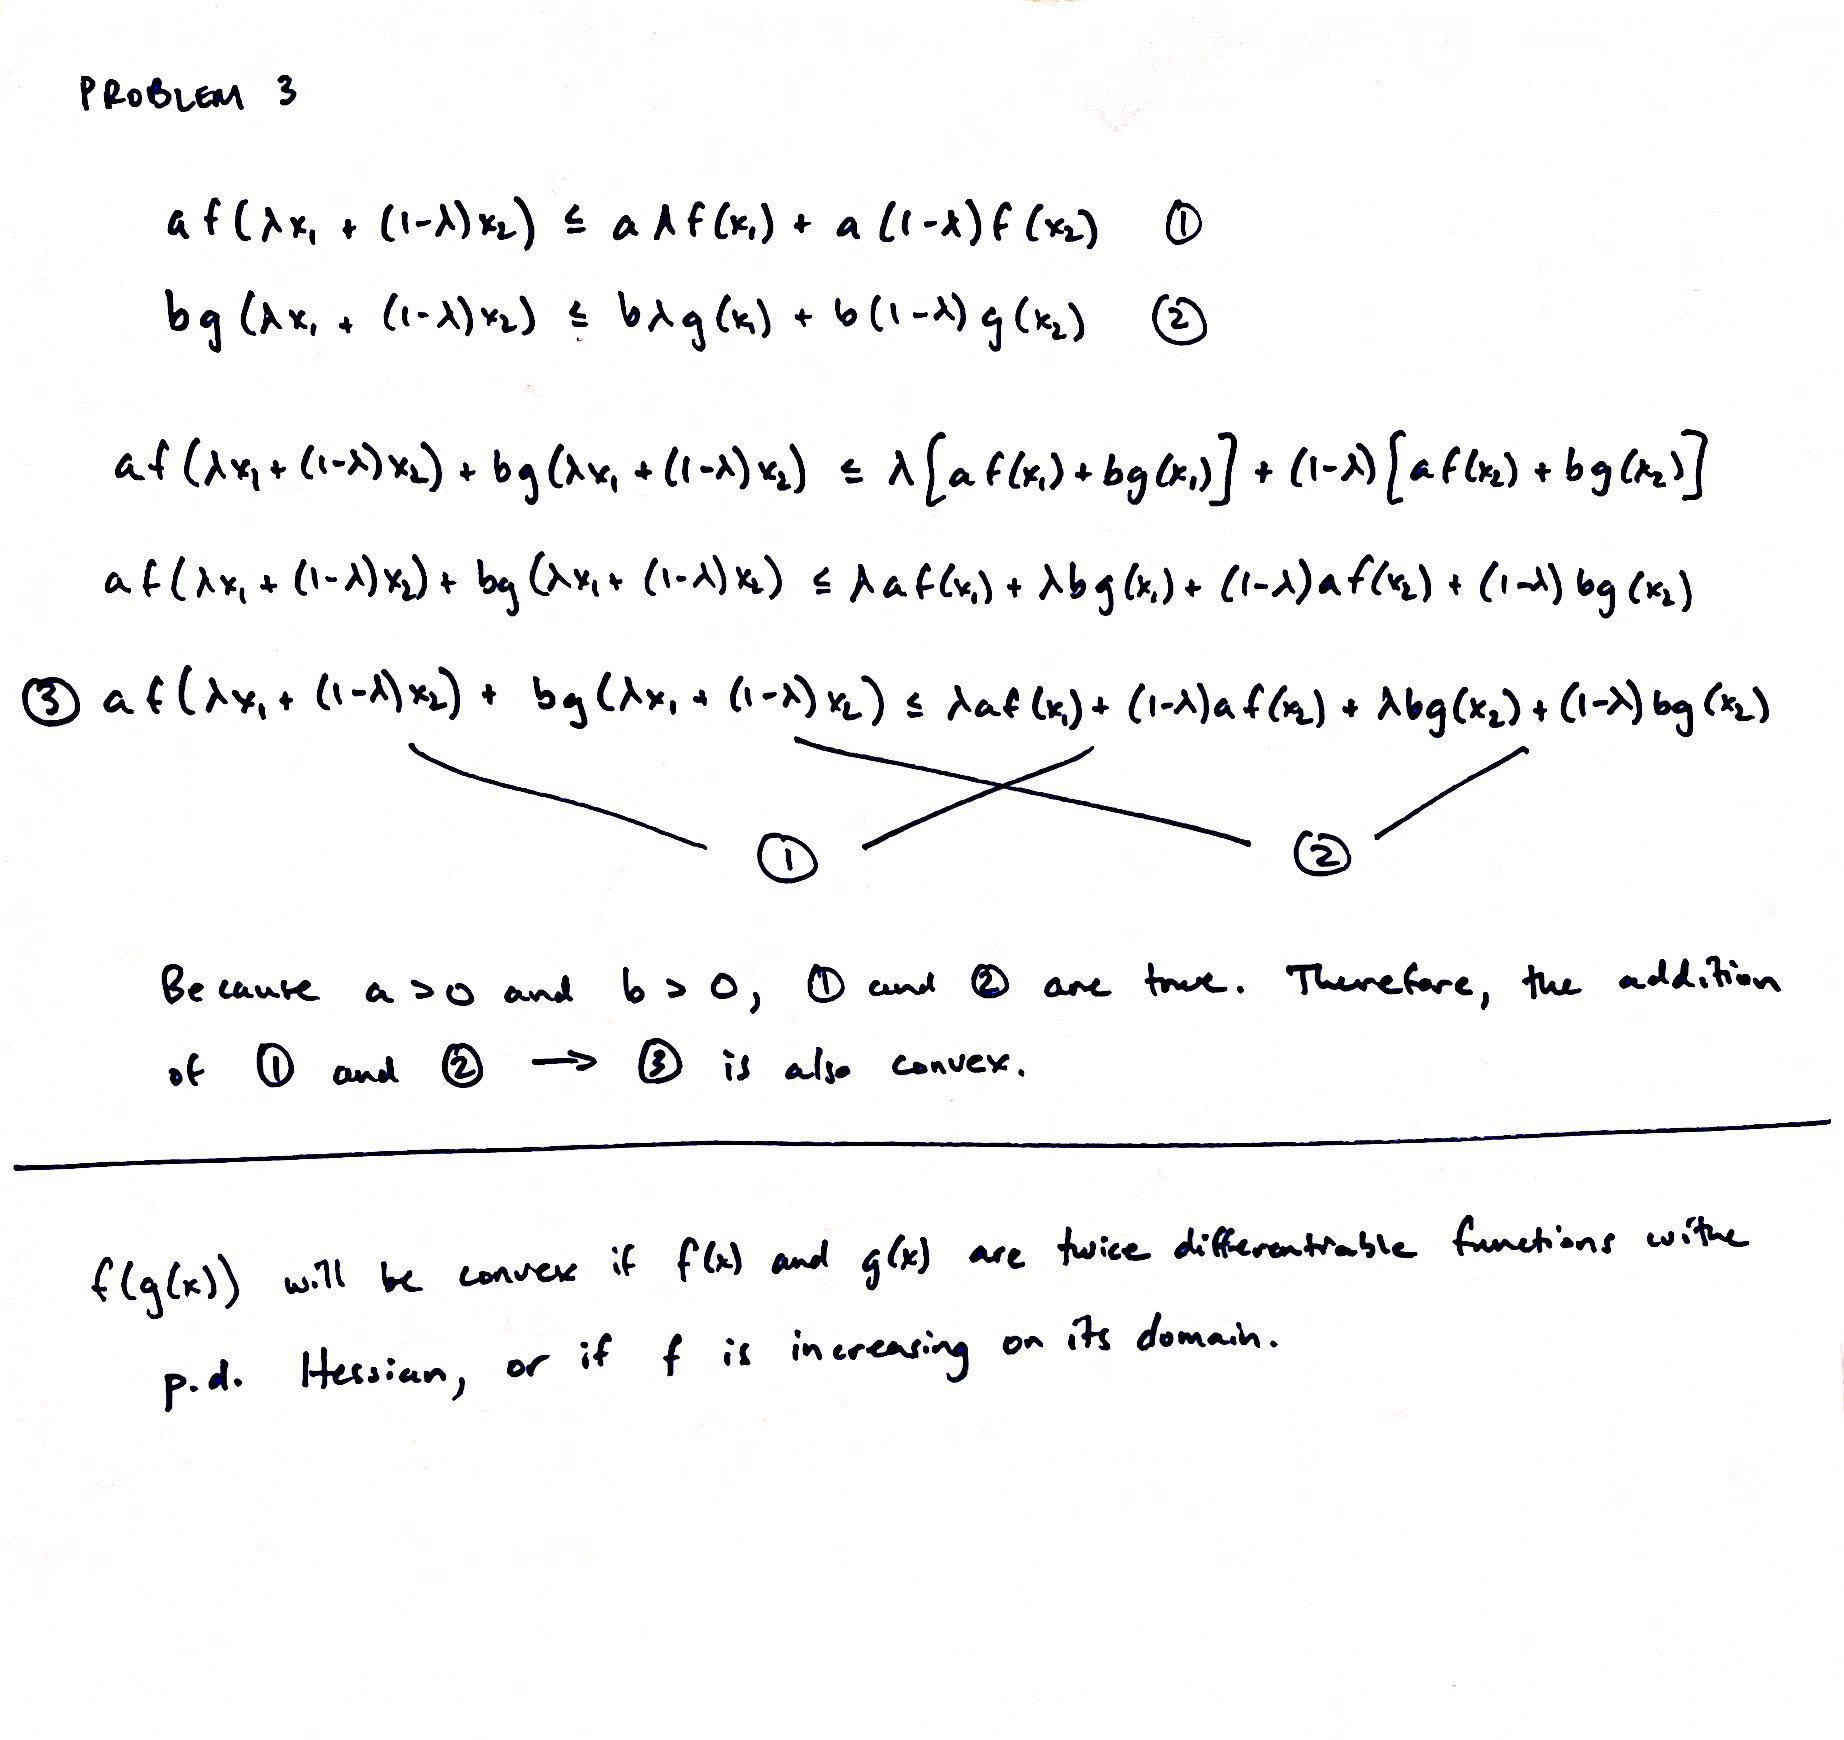

In [5]:
display.Image("img/Problem 3.jpeg")

## Problem 5

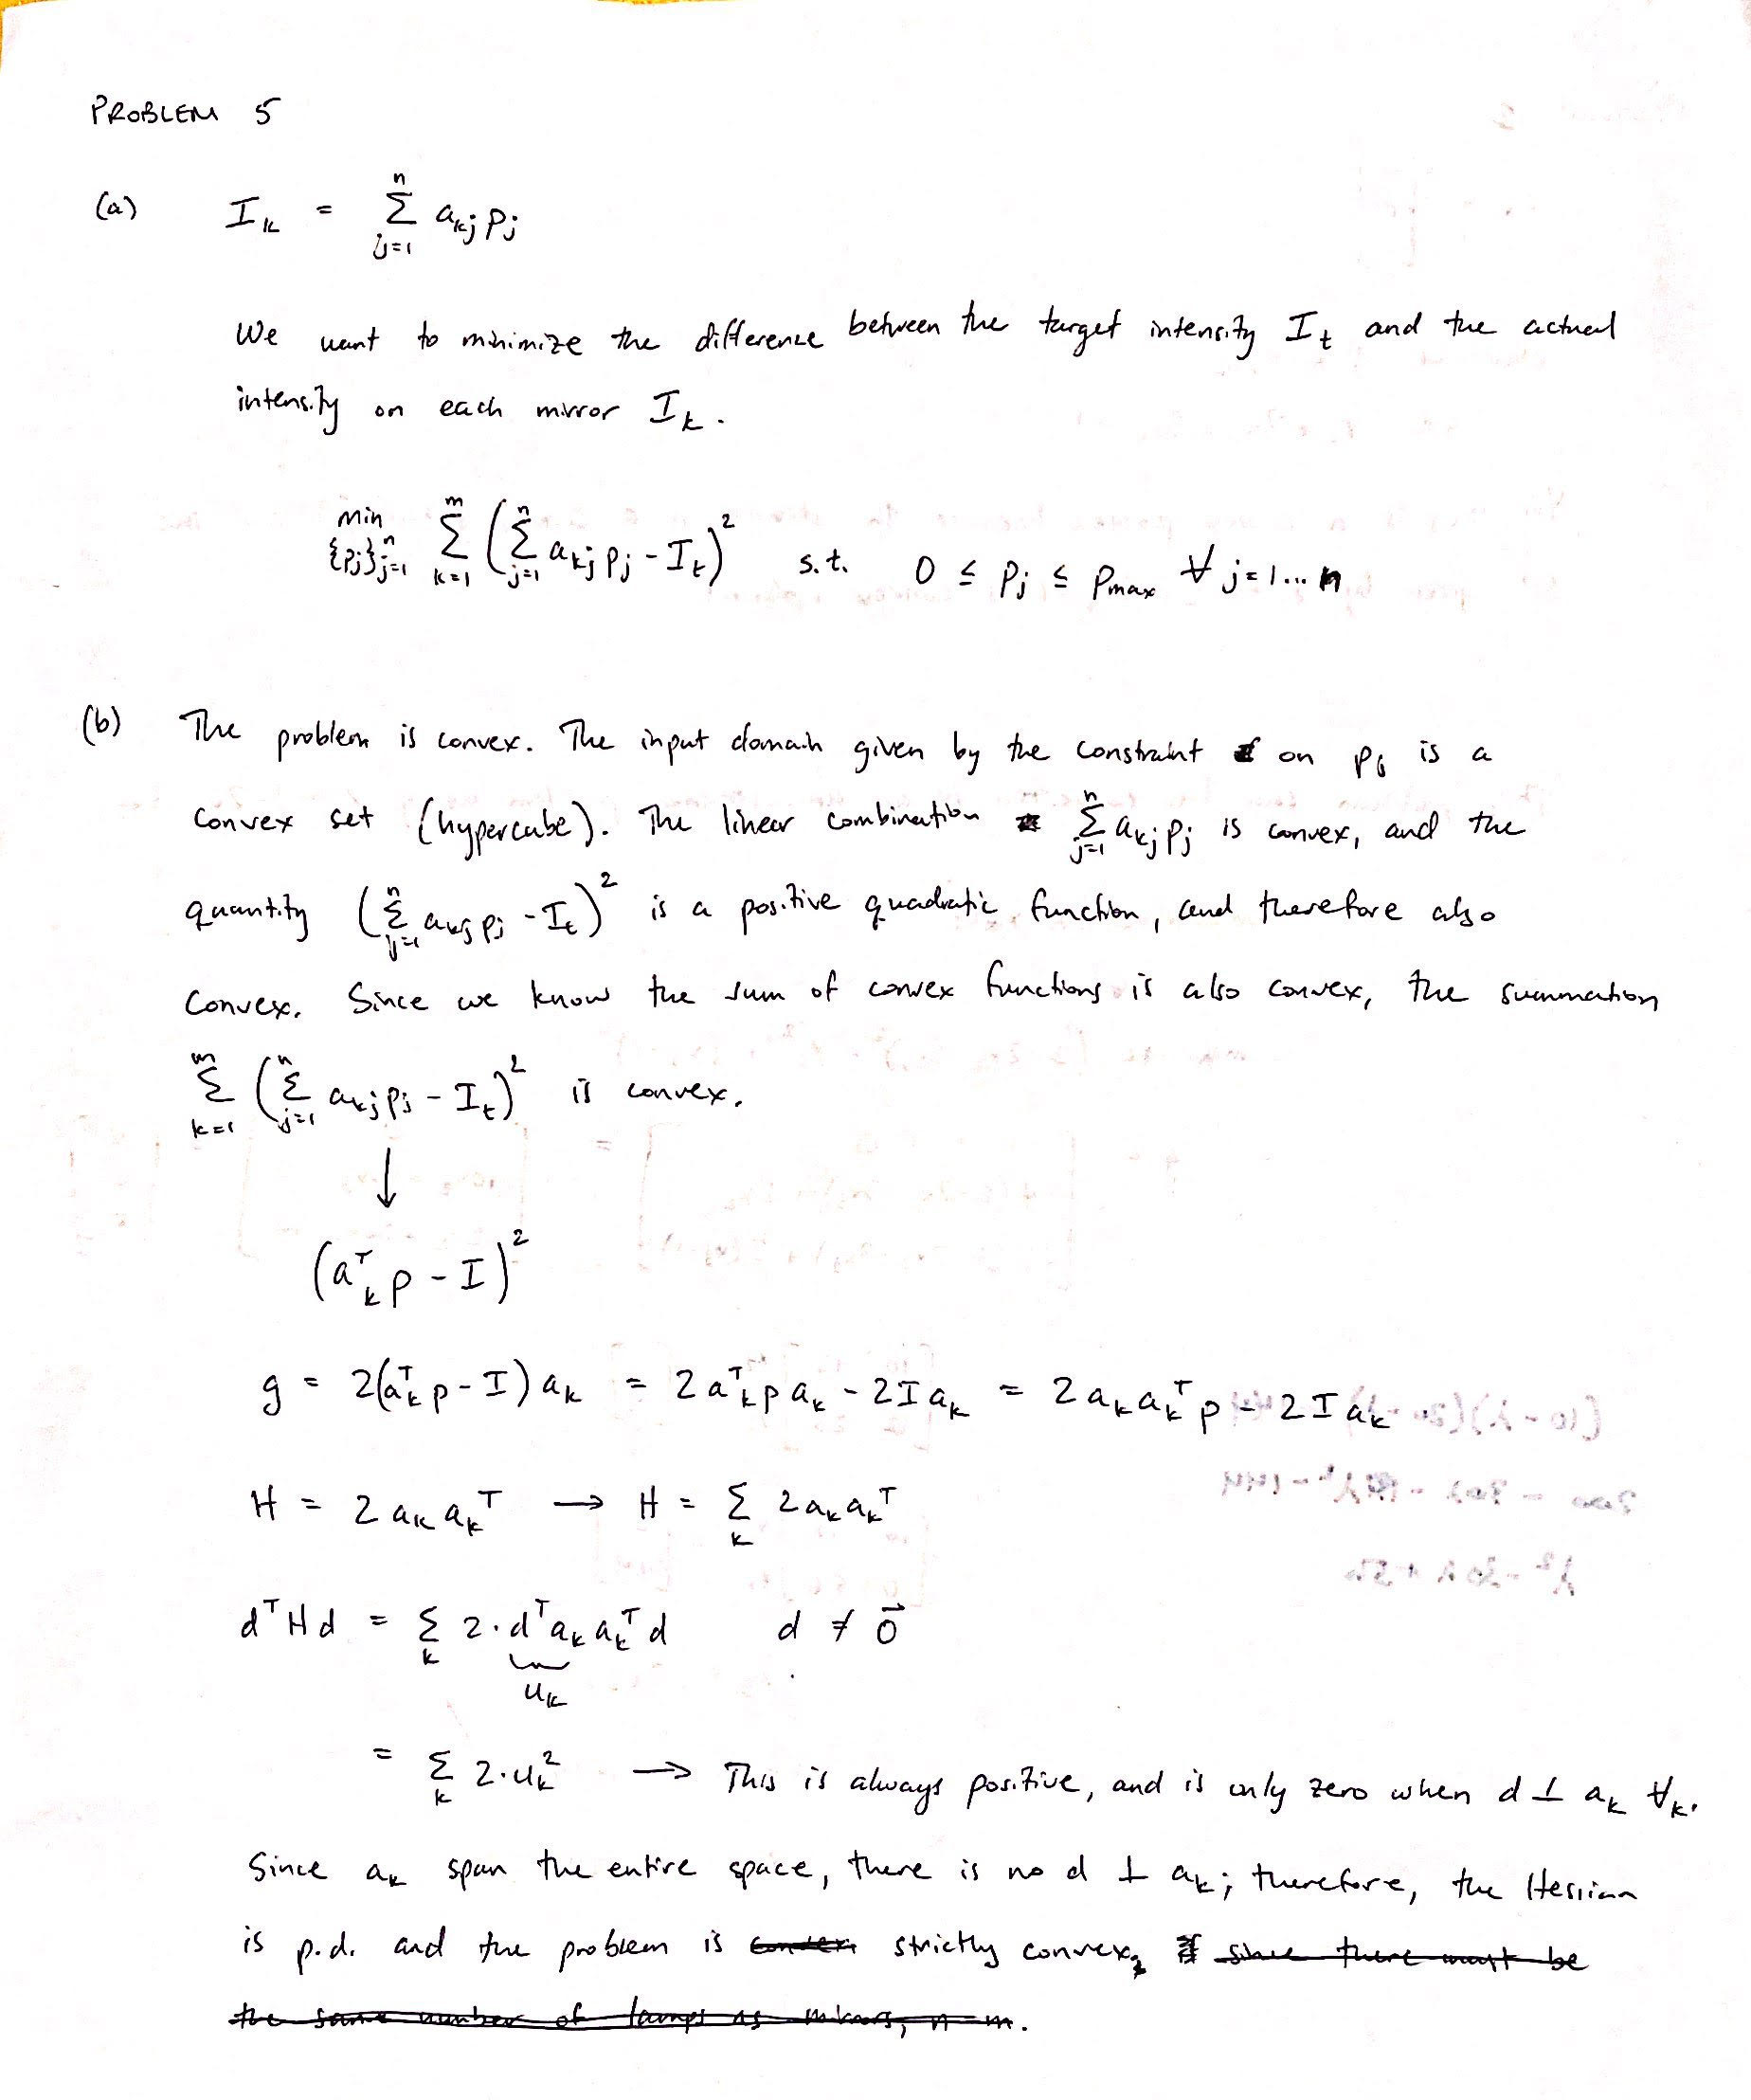

In [6]:
display.Image("img/Problem 5_1.jpeg")

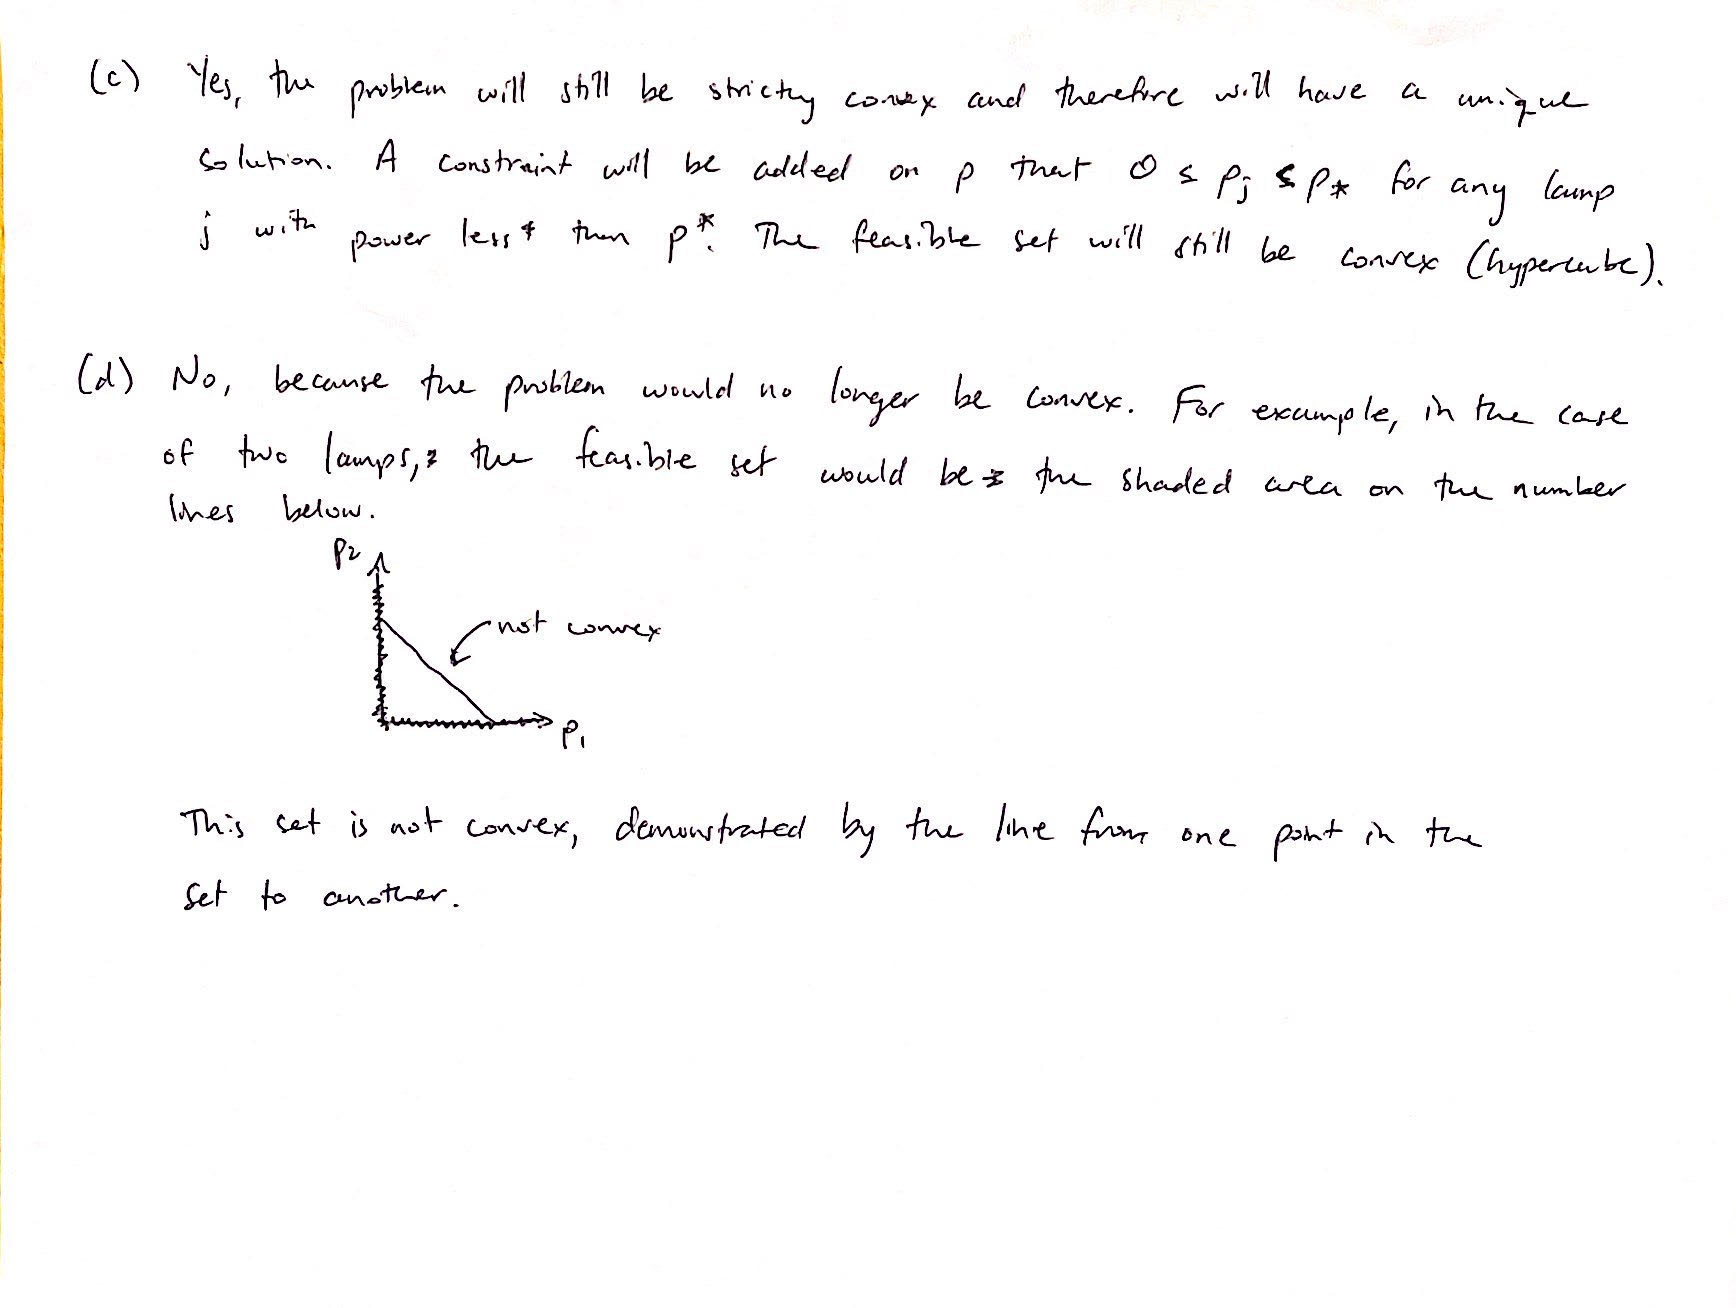

In [7]:
display.Image("img/Problem 5_2.jpeg")